## test the chatbot models we have

In [3]:
# load data
import csv
# read in raw data
with open('../data/clean_withid_noblanks_part2.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    raw_all = []
    match_all = []
    time_all = []
    slot_all = []
    for row in readCSV:
        match_all.append(row[0])
        time_all.append(row[1])
        slot_all.append(row[2])
        raw_all.append(row[3])
print(len(raw_all))

2457459


In [57]:
Ntrain = 10000
raw = raw_all[:Ntrain]
tt = time_all[:Ntrain]
slot = slot_all[:Ntrain]
match = match_all[:Ntrain]

raw_test = raw_all[Ntrain+1:Ntrain+10000]
tt_test = time_all[Ntrain+1:Ntrain+10000]
slot_test = slot_all[Ntrain+1:Ntrain+10000]
match_test = match_all[Ntrain+1:Ntrain+10000]

In [58]:
# TF-IDF approach
import nltk
import numpy as np
import string # to process standard python strings
sent_tokens = raw
lemmer = nltk.stem.WordNetLemmatizer()
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

In [21]:
# chatterbot
from chatterbot import ChatBot
chatbot = ChatBot('dotai', read_only=True)
chatbot.get_response('glhf')

<Statement text:shutup nerd>

In [22]:
# test the model
Nrec = len(raw_test)
rec = 0
dt = 10.
response1 = []
response2 = []
response0 = []
while rec < Nrec-1:
    if match_test[rec+1] == match_test[rec] and float(tt_test[rec+1]) < float(tt_test[rec])+dt:
        print(['Found conversation at rec: ',rec])
        user_response = raw_test[rec]
        response0.append(raw_test[rec+1])
        response1.append(response(user_response))
        sent_tokens.remove(user_response)
        response2.append(chatbot.get_response(user_response))
        rec = rec + 2
    else:
        rec = rec + 1
        
with open('response0.txt', 'w') as f:
    for item in response0:
        f.write("%s\n" % item)
with open('response1.txt', 'w') as f:
    for item in response1:
        f.write("%s\n" % item)
with open('response2.txt', 'w') as f:
    for item in response2:
        f.write("%s\n" % item)

['Found conversation at rec: ', 0]


D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


['Found conversation at rec: ', 2]
['Found conversation at rec: ', 4]
['Found conversation at rec: ', 7]
['Found conversation at rec: ', 11]
['Found conversation at rec: ', 14]
['Found conversation at rec: ', 16]
['Found conversation at rec: ', 18]
['Found conversation at rec: ', 20]
['Found conversation at rec: ', 22]
['Found conversation at rec: ', 25]
['Found conversation at rec: ', 29]
['Found conversation at rec: ', 31]
['Found conversation at rec: ', 38]
['Found conversation at rec: ', 40]
['Found conversation at rec: ', 42]
['Found conversation at rec: ', 45]
['Found conversation at rec: ', 49]
['Found conversation at rec: ', 51]
['Found conversation at rec: ', 54]
['Found conversation at rec: ', 56]
['Found conversation at rec: ', 58]
['Found conversation at rec: ', 60]
['Found conversation at rec: ', 62]
['Found conversation at rec: ', 64]
['Found conversation at rec: ', 66]
['Found conversation at rec: ', 68]
['Found conversation at rec: ', 74]
['Found conversation at rec: ',

No value for search_text was available on the provided input


['Found conversation at rec: ', 246]
['Found conversation at rec: ', 248]
['Found conversation at rec: ', 252]
['Found conversation at rec: ', 256]
['Found conversation at rec: ', 259]
['Found conversation at rec: ', 261]
['Found conversation at rec: ', 264]
['Found conversation at rec: ', 266]
['Found conversation at rec: ', 268]
['Found conversation at rec: ', 270]
['Found conversation at rec: ', 272]
['Found conversation at rec: ', 274]
['Found conversation at rec: ', 276]
['Found conversation at rec: ', 278]
['Found conversation at rec: ', 280]
['Found conversation at rec: ', 284]
['Found conversation at rec: ', 286]
['Found conversation at rec: ', 291]
['Found conversation at rec: ', 293]
['Found conversation at rec: ', 295]
['Found conversation at rec: ', 297]
['Found conversation at rec: ', 299]
['Found conversation at rec: ', 301]
['Found conversation at rec: ', 307]
['Found conversation at rec: ', 309]
['Found conversation at rec: ', 311]
['Found conversation at rec: ', 313]
[

['Found conversation at rec: ', 867]
['Found conversation at rec: ', 869]
['Found conversation at rec: ', 872]
['Found conversation at rec: ', 874]
['Found conversation at rec: ', 876]
['Found conversation at rec: ', 878]
['Found conversation at rec: ', 880]
['Found conversation at rec: ', 883]
['Found conversation at rec: ', 885]
['Found conversation at rec: ', 896]
['Found conversation at rec: ', 901]
['Found conversation at rec: ', 903]
['Found conversation at rec: ', 905]
['Found conversation at rec: ', 907]
['Found conversation at rec: ', 909]
['Found conversation at rec: ', 915]
['Found conversation at rec: ', 917]
['Found conversation at rec: ', 919]
['Found conversation at rec: ', 921]
['Found conversation at rec: ', 924]
['Found conversation at rec: ', 926]
['Found conversation at rec: ', 928]
['Found conversation at rec: ', 931]
['Found conversation at rec: ', 933]
['Found conversation at rec: ', 936]
['Found conversation at rec: ', 940]
['Found conversation at rec: ', 943]
[

In [29]:
response2[0].text

'nca game'

In [ ]:
# load saved data
with open('response0.txt') as f:
    response0 = f.readlines()
with open('response1.txt') as f:
    response1 = f.readlines()
with open('response2.txt') as f:
    response2 = f.readlines()

In [55]:
# word count
word_tmp = [nltk.word_tokenize(i.lower()) for i in response0]
word0 = [item for sublist in word_tmp for item in sublist]
word_tmp = [nltk.word_tokenize(i.lower()) for i in response1]
word1 = [item for sublist in word_tmp for item in sublist]
word_tmp = [nltk.word_tokenize(i.text.lower()) for i in response2]
word2 = [item for sublist in word_tmp for item in sublist]

from collections import Counter
C0 = Counter(word0)
C1 = Counter(word1)
C2 = Counter(word2)
word_sort = []
frac0_sort = []
frac1_sort = []
frac2_sort = []
for k,v in C0.most_common()[:5]:
    word_sort.append(k)
    frac0_sort.append(v/len(word0)*100)
    frac1_sort.append(C1[k]/len(word1)*100)
    frac2_sort.append(C2[k]/len(word2)*100)
print(C0.most_common()[:5])
print(C1.most_common()[:5])
print(C2.most_common()[:5])

w = csv.writer(open("count0.csv", "w"))
for key, val in C0.most_common():
    w.writerow([key, val])
w = csv.writer(open("count1.csv", "w"))
for key, val in C1.most_common():
    w.writerow([key, val])
w = csv.writer(open("count2.csv", "w"))
for key, val in C2.most_common():
    w.writerow([key, val])

[('gg', 39), ('d', 14), ('ez', 14), ('wp', 13), ('lol', 9)]
[('i', 121), ('you', 62), ('am', 61), ('do', 59), ('sorry', 58)]
[('gg', 49), ('ez', 20), ('u', 17), ('i', 13), ('game', 12)]


In [47]:
frac2_sort

[6.355382619974059,
 0.25940337224383914,
 2.594033722438392,
 0.38910505836575876,
 1.1673151750972763]

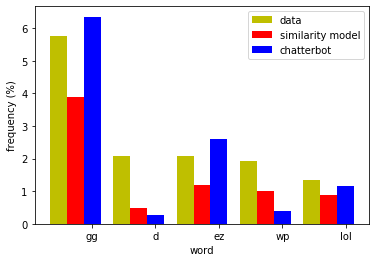

In [56]:
import matplotlib.pyplot as plt
 
name_list = word_sort
x =list(range(len(word_sort)))
total_width, n = 0.8, 3
width = total_width / n
 
plt.bar(x, frac0_sort, width=width, label='data',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, frac1_sort, width=width, label='similarity model',tick_label = name_list,fc = 'r')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, frac2_sort, width=width, label='chatterbot',tick_label = name_list,fc = 'b')
plt.ylabel('frequency (%)')
plt.xlabel('word')
plt.legend()
plt.show()
plt.savefig('top5_frequency.png')